https://www.kaggle.com/ash316/great-olympians-eda

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [0]:
summer = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/summer.csv")
winter = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/winter.csv")
track = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/data.csv")
countries = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/dictionary.csv")

In [4]:
summer.head(2)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver


In [5]:
winter.head(2)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze


In [6]:
track.head(2)

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m


In [0]:
summer['Athlete']=summer['Athlete'].str.split(', ').str[::-1].str.join(' ')
summer['Athlete']=summer['Athlete'].str.title()
winter['Athlete']=winter['Athlete'].str.split(', ').str[::-1].str.join(' ')
winter['Athlete']=winter['Athlete'].str.title()

In [0]:
summer=summer.merge(countries,left_on='Country',right_on='Code',how='left')
summer=summer[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
summer.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']

In [16]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [19]:
print('The Highest Decorated Male Athlete is: ',summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].index[0],'with: ',summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].values[0],' medals')
print('The Highest Decorated Female Athlete is: ',summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].index[0],'with: ',summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].values[0],' medals')

The Highest Decorated Male Athlete is:  Michael Phelps with:  22  medals
The Highest Decorated Female Athlete is:  Larisa Latynina with:  18  medals


In [20]:
medals=summer.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals=medals.drop_duplicates(subset=['Medal'],keep='first')
medals.columns=[['Athlete','Medal','Count']]
medals

,Athlete,Medal,Count
17344,Michael Phelps,Gold,18
7645,Franziska Van Almsick,Bronze,6
22307,Shirley Farber Babashoff,Silver,6


# Now let's check Medals by Country

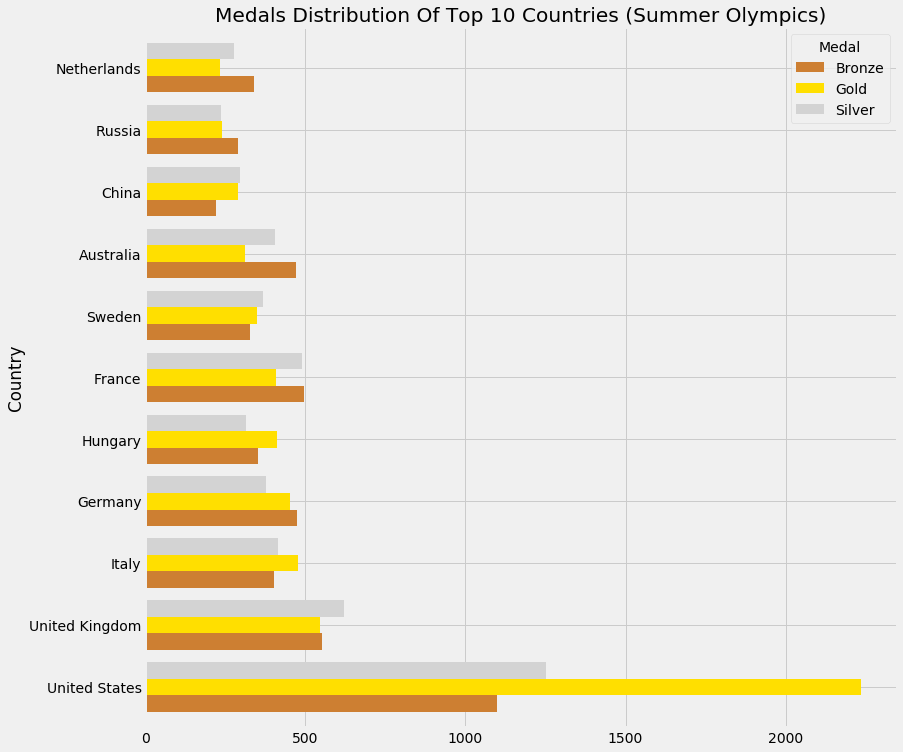

In [34]:
medals_country=summer.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country=medals_country.pivot('Country','Medal','Gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

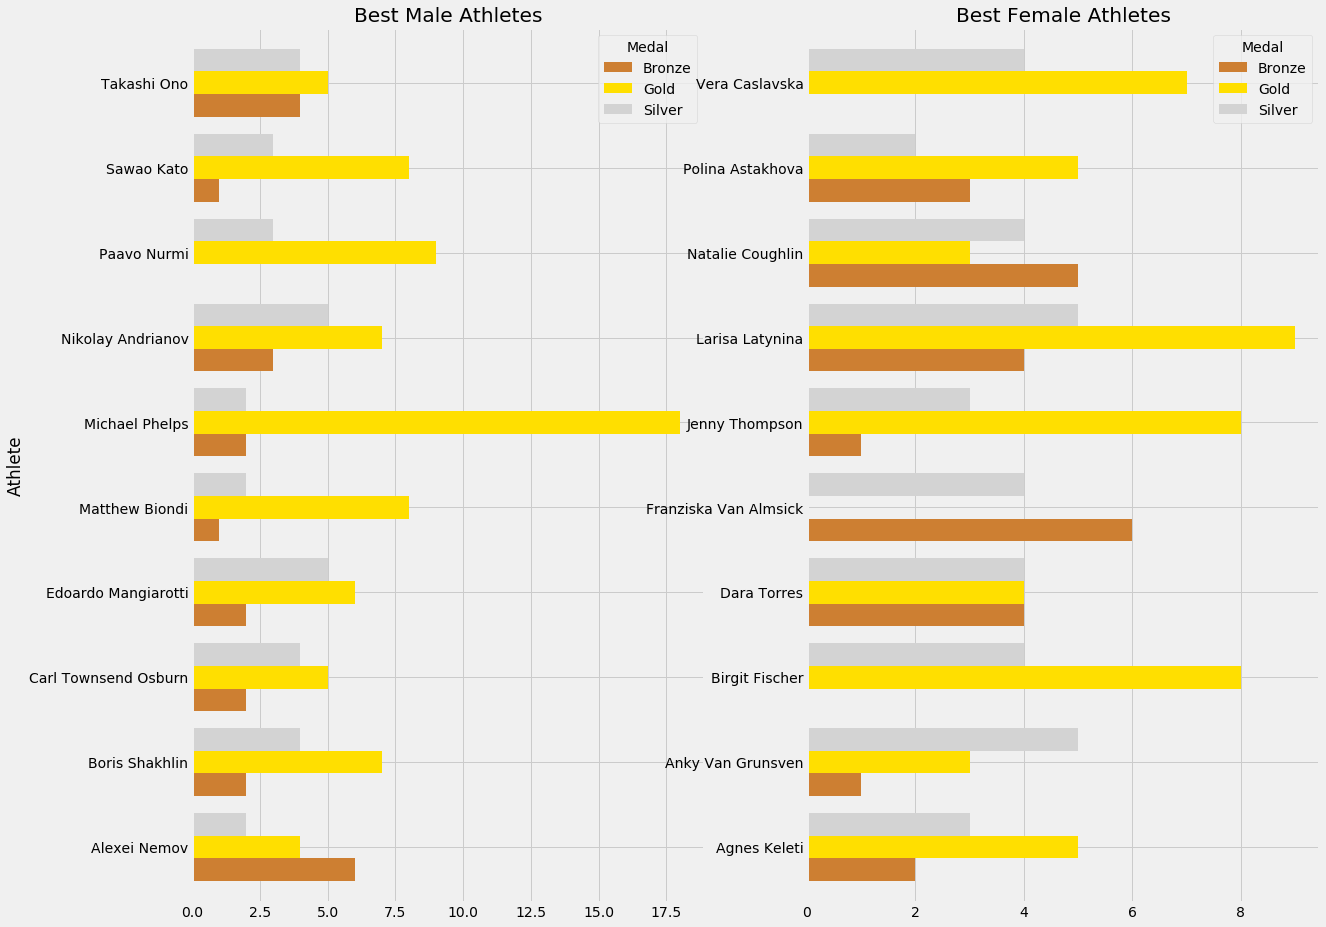

In [35]:
fig,ax=plt.subplots(1,2,figsize=(18,15))
men=summer[summer['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
men=men[men['Athlete'].isin(summer['Athlete'].value_counts().index[:15])]
men=men.pivot('Athlete','Medal','Code')
men.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

women=summer[summer['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
women=women[women['Athlete'].isin(summer['Athlete'].value_counts().index[:30])]
women=women.pivot('Athlete','Medal','Code')
women.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()

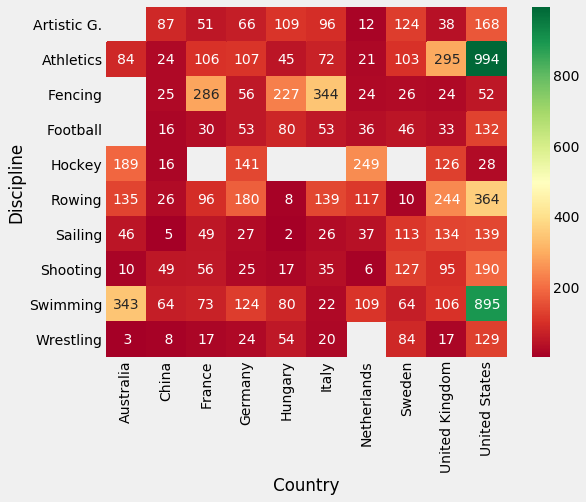

In [36]:
summer.loc[summer['Discipline'].str.contains('Wrestling'),'Discipline']='Wrestling'
summer.loc[summer['Discipline'].str.contains('Weightlifting'),'Discipline']='Weightlifting'
test=summer[summer['Country'].isin(summer['Country'].value_counts()[:10].index)]
test=test[test['Discipline'].isin(summer['Discipline'].value_counts()[:10].index)]
test=test.groupby(['Country','Discipline'])['Sport'].count().reset_index()
test=test.pivot('Discipline','Country','Sport')
sns.heatmap(test,cmap='RdYlGn',annot=True,fmt='2.0f')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

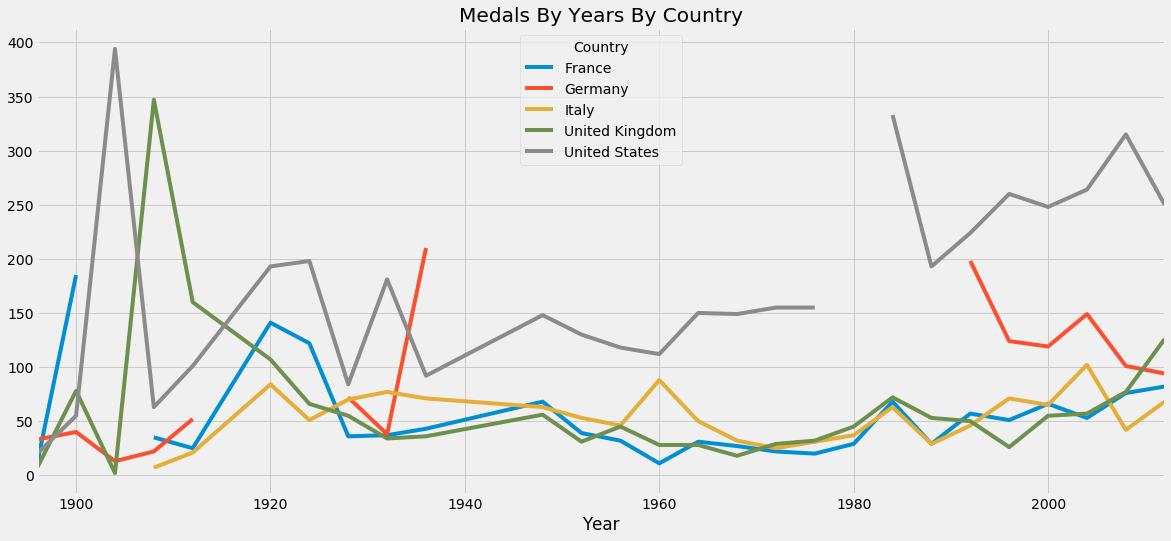

In [37]:
test1=summer.groupby(['Country','Year'])['Medal'].count().reset_index()
test1=test1[test1['Country'].isin(summer['Country'].value_counts()[:5].index)]
test1=test1.pivot('Year','Country','Medal')
test1.plot()
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.title('Medals By Years By Country')
plt.show()

## Winter Game Analysis

In [38]:
print('The Highest Decorated Male Athlete is: ',winter[winter['Gender']=='Men']['Athlete'].value_counts()[:1].index[0],'with: ',winter[winter['Gender']=='Men']['Athlete'].value_counts()[:1].values[0],' medals')
print('The Highest Decorated Male Athlete is: ',winter[winter['Gender']=='Women']['Athlete'].value_counts()[:1].index[0],'with: ',winter[winter['Gender']=='Women']['Athlete'].value_counts()[:1].values[0],' medals')

The Highest Decorated Male Athlete is:  Ole Einar Bjoerndalen with:  13  medals
The Highest Decorated Male Athlete is:  Raisa Smetanina with:  10  medals


## Athletes with the Highest Medal Type

In [43]:
winter=winter.merge(countries,left_on='Country',right_on='Code',how='left')
winter=winter[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
winter.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']
medals=winter.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals=medals.drop_duplicates(subset=['Medal'],keep='first')
medals.columns=[['Athlete','Medal','Count']]
medals

,Athlete,Medal,Count
569,Björn Daehlie,Gold,8
1655,Harri Kirvesniemi,Bronze,6
3568,Raisa Smetanina,Silver,5


In [45]:
medals_map = winter.groupby(['Country','Code'])['Medal'].count().reset_index()
medals_map.head()

,Country,Code,Medal
0,Australia,AUS,15
1,Austria,AUT,280
2,Belarus,BLR,15
3,Belgium,BEL,13
4,Bulgaria,BUL,6


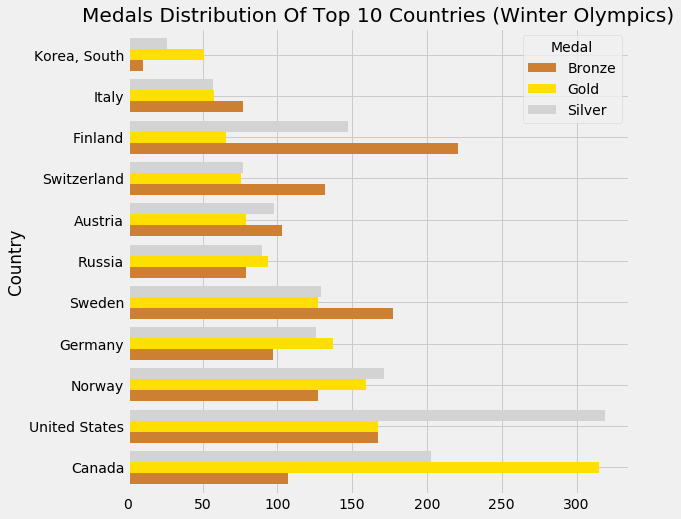

In [49]:
medals_country=winter.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country=medals_country.pivot('Country','Medal','Gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medals Distribution Of Top 10 Countries (Winter Olympics)')
plt.show()

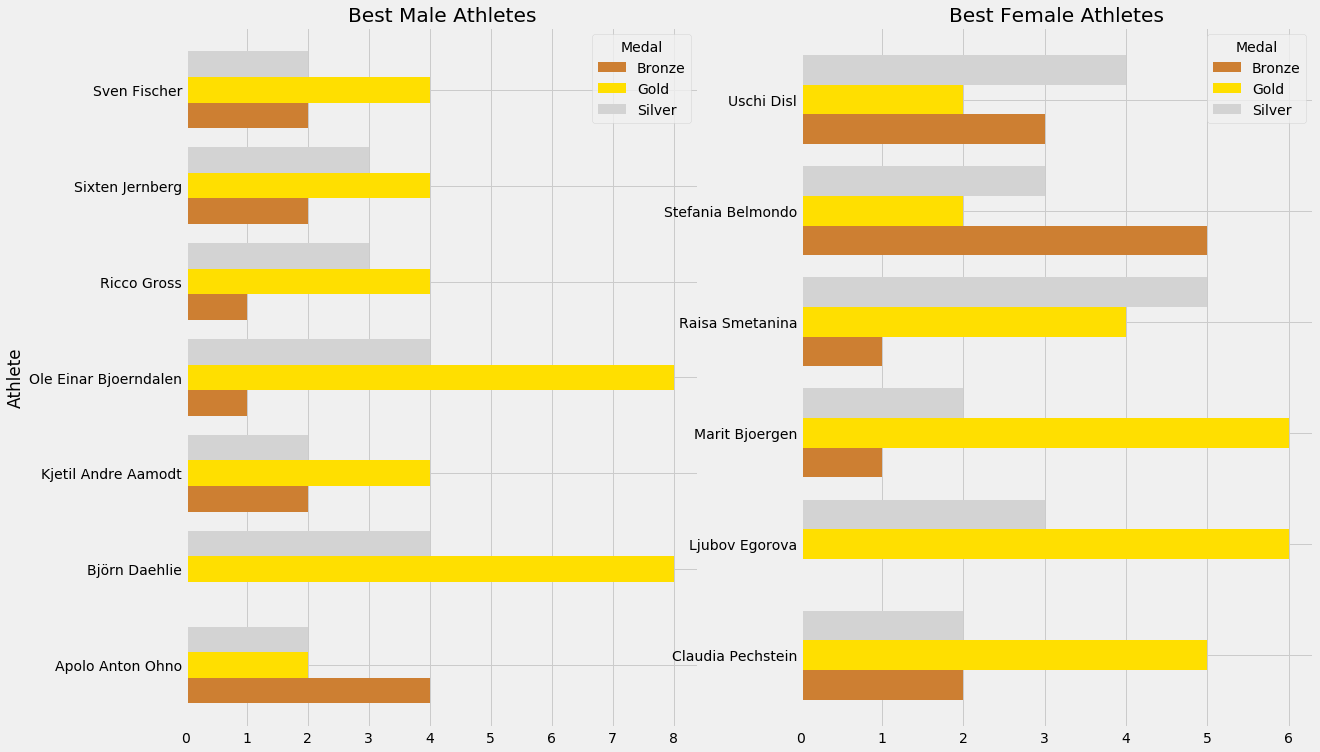

In [50]:
fig,ax=plt.subplots(1,2,figsize=(18,12))
men=winter[winter['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
men=men[men['Athlete'].isin(winter['Athlete'].value_counts().index[:15])]
men=men.pivot('Athlete','Medal','Code')
men.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

women=winter[winter['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
women=women[women['Athlete'].isin(winter['Athlete'].value_counts().index[:10])]
women=women.pivot('Athlete','Medal','Code')
women.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()

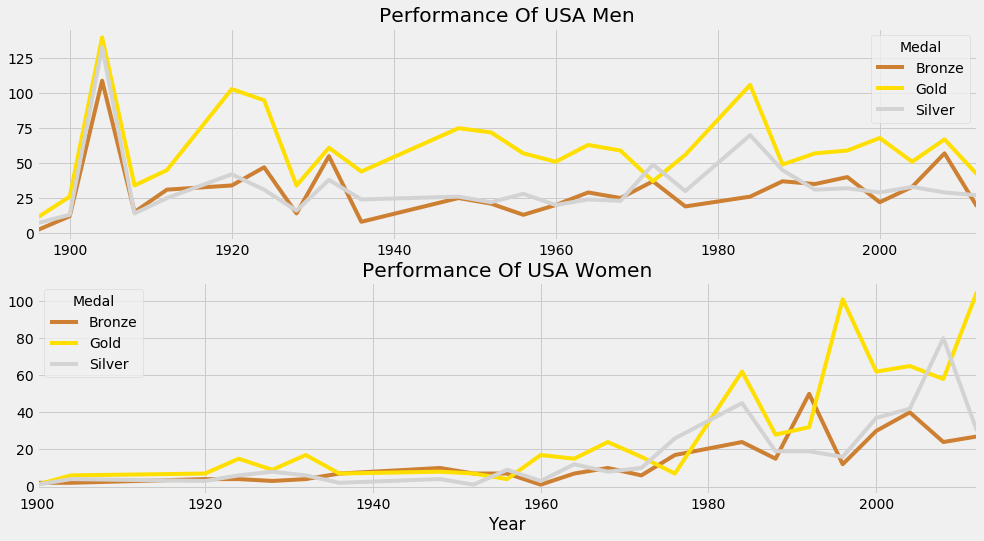

In [51]:
USA_medal_male=summer[(summer['Country']=='United States')&(summer['Gender']=='Men')]
USA_medal_female=summer[(summer['Country']=='United States')&(summer['Gender']=='Women')]
fig,ax=plt.subplots(2,figsize=(15,8))
male=USA_medal_male.groupby(['Medal','Year'])['Event'].count().reset_index()
male=male.pivot('Year','Medal','Event')
male.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_title('Performance Of USA Men')
female=USA_medal_female.groupby(['Medal','Year'])['Event'].count().reset_index()
female=female.pivot('Year','Medal','Event')
female.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Performance Of USA Women')
plt.show()